In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import binom,geom
from scipy.stats import ttest_1samp,ttest_ind, ttest_rel
from scipy.stats import chi2_contingency,chisquare,chi2
from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import poisson

# Hypothesis Testing Framework

Q1.A group of people have volunteered to try out a diet for weight loss for 3 months. How should the null and alternate hypothesis be set up?

Ans.

H0: Diet has no impact on weight;

Ha: Diet reduces weight

Q2.A test is done to detect if a person has a virus. What is the null (H0) and alternate (Ha) hypothesis

Ans.

H0: Patient has no virus;

Ha: Patient has virus

Q3.The verbal reasoning in GRE has an average score of 150, and a standard deviation of 8.5. A coaching center claims to improve these numbers for their students. How should the null and alternate hypothesis be set up?

Ans.

H0: Coaching does not improve score;

Ha: Coaching improves score

Q4.Weekly sales of shampoo bottles has an average of 1800 . A marketing company feels that this can be improved with right advertisement and promotions. What should the null and alternate hypothesis be, to validate their claim? Let μ denote the average sales after marketing.

Ans.

H0:μ=1800 and Ha:μ>1800

Exp-

Since the default assumption here is that the marketing has no effect, we set up the null hypothesis as H0:μ=1800

Now the claim is that the sales will improve. Thus, the alternate hypothesis here should be Ha:μ>1800


Q5.In a court case, the null hypothesis is that the defendant is innocent. Identify the Type-2 error among the following.

Ans.

The defendant is guilty, but the judge pronounces him innocent

Exp-

The null and alternate hypothesis are:

Null hypothesis (H0) : the defendant is innocent 

Alternate hypothesis (Ha): the defendant is guilty

Type-2 error is when the null hypothesis is false, but we fail to reject the null hypothesis (false negative). Since the null hypothesis is that the defendant is innocent, the type 2 error occurs when defendant is guilty, but the judge wrongly pronounces him innocent.




Q6.When you ride your bike, the null hypothesis H0 is that the bike is safe to drive. Which of these is a Type-1 error?

Ans.

The bike is safe, but you think it is not safe

Exp-

Null hypothesis (H0) : the bike is safe to drive 

Alternate hypothesis (Ha): the bike is not safe to drive

Type-1 error is when the null hypothesis is true, but we reject the null hypothesis (false positive). Since the null hypothesis is that the bike is safe, the type 1 error occurs when the bike is safe but we wrongly think that it is not safe

# ClassWork/Notes of Hypothesis Testing

1.Type-1 & Type-2 Error

Type-1: When the Null Hypothesis is true but we reject the Null Hypothesis
    
Type-2: When the Null Hypothesis is false but we accept the Null Hypothesis

2.H0=No Virus

Ha=There is Virus

if answer is "False Negative" then Consider it as Type-2 Error and "True Negative" then consider it as Type-1 error

3.If P_val>alpha:

    Print(H0)
    
else:

    print(Ha)

# Z-Test

Q1.A country has a population average height of 65 inches with standard deviation of 2.5. A person feels people from his state are shorter. He takes the average of 20 people, and sees that it is 64.5. At a 5% significance level (or 95% confidence level), can we conclude that people from his state are shorter, using the Z-test? What is the p-value?

In [2]:
#H0 : Not shorter
#Ha : Shorter
#left tailed

pop_mean=65
std_dev=2.5
sam_mean=64.5
n=20
sigma=0.05 #5% significance level 

std_err=std_dev/np.sqrt(n)

z_stats=(sam_mean-pop_mean)/std_err
print("z_stats: ",z_stats)
p_val=norm.cdf(z_stats)

print("p_val: ",p_val)

if sigma>p_val:
    print("Reject Ho")
    print("People are shorter")
else:
    print("Do not Reject Ho")
    print("People are not shorter")

z_stats:  -0.8944271909999159
p_val:  0.18554668476134878
Do not Reject Ho
People are not shorter


Q2.The verbal reasoning in GRE has an average score of 150, and a standard deviation of 8.5. A coaching center claims that their students are better. An average of 10 people showed that the students from this coaching center have an average of 155. At a 5% significance level (or 95% confidence level), can we conclude that students from the coaching center are better? Use the Z-test, and compute the p-value.

In [3]:
#H0=Students are not better
#Ha=Students are better
#Right Tailed

pop_mean=150
std_dev=8.5
n=10
sam_mean=155
alpha=0.05 #5% significance level

std_err=std_dev/np.sqrt(n)

print('std_err: ',std_err)

z=(sam_mean-pop_mean)/std_err
print("z: ",z)
p_val=1-norm.cdf(z)

print("p_val: ",p_val)
if sigma>p_val:
    print("Reject H0")
    print("Students are better")
else:
    print("Do not reject H0")
    print("Students are not better")

std_err:  2.687936011143122
z:  1.8601633295108115
p_val:  0.031431210741779014
Reject H0
Students are better


Q3.A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.

The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125.

Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

Note: Round off the z-score to two decimal places.

In [4]:
#H0: the average number of pastries produced per day is less than or equal to 500 (μ≤500)
#Ha : the average number exceeds 500 (μ>500)

pop_mean=500
std_dev=125
n=70
sam_mean=530
sigma=0.05 #5% significance level 

std_err=std_dev/np.sqrt(n)
print('std_err:',std_err)

z_stats=(sam_mean-pop_mean)/std_err
print('z_stats :',z_stats)


"""Since, observed z-score (2.01) > critical z-value(1.64), we reject the null hypothesis for the above right tailed test.
Thus, we conclude that the average number exceeds 500."""

std_err: 14.94035761667992
z_stats : 2.007984063681781


'Since, observed z-score (2.01) > critical z-value(1.64), we reject the null hypothesis for the above right tailed test.\nThus, we conclude that the average number exceeds 500.'

Q4.The Chai Point stall at Bengaluru airport estimates that each person visiting the store drinks an average of 1.7 small cups of tea.

Assume a population standard deviation of 0.5 small cups. A sample of 30 customers collected over a few days averaged 1.85 small cups of tea per person.

Test the claim using a z-test at an alpha = 0.05 significance value, with a critical z-score value of ±1.96.

Note: Round off the z-score to two decimal places.

In [5]:
#(H0): the average number of small cups of tea per customer is equal to 1.7
#Ha : the average number is either greater than or less than 1.7.

pop_mean=1.7
std_dev=0.5
n=30
sam_mean=1.85
sigma=0.05 #5% significance level 

std_err=std_dev/np.sqrt(n)
print('std_err:',std_err)

z_stats=(sam_mean-pop_mean)/std_err
print('z_stats :',z_stats)

"""The computed z-score is 1.64, and since 1.64 is less than 1.96, the null hypothesis cannot be rejected."""


std_err: 0.09128709291752768
z_stats : 1.6431676725155


'The computed z-score is 1.64, and since 1.64 is less than 1.96, the null hypothesis cannot be rejected.'

Q5.The student hostel office at IIT Madras estimates that each student uses more than 3.5 buckets of water per day. 45 students in a certain wing averaged 3.72 buckets of water per day.

Assume that the population standard deviation is 0.7 buckets. What is the critical sample mean for this population, assuming a critical z- value of 1.28?

Note: The critical sample mean is defined as the mean value for which the z-score is equal to the critical value. Also, round off the final answer to three decimal places.

In [6]:
pop_mean=3.5
std_dev=0.7
n=45

z_critical=1.28

std_error=std_dev/np.sqrt(n)
print('std_error: ',std_error)
x=(z_critical*std_error)+pop_mean
print('ans: ',x)

std_error:  0.10434983894999017
ans:  3.6335677938559874


# ClassWork/Notes of Z-Test

1.Z-Test works for only Numerical Data


2.if Observed z-score > critical z-value/Given z-score:

    Reject Null Hypothesis
    
else:

    Accept Null Hypothesis

3.Sample mean > Population Mean then it will consider as RIGHT TAILED (1-norm.cdf(z))


Sample mean < Population Mean then it will consider as LEFT TAILED (norm.cdf(z))

4.One Benifit of Z-test is that, here we know the mean of our Population data

And as per the Z-test we need to compare the mean of two data then we have to perform Z-Test There 

# T-Test

Q1.Based on field experiments, a new variety green gram is expected to given an yield of 12.0 quintals per hectare.

The variety was tested on 10 randomly selected farmers fields. The yield (quintals/hectare) were recorded as

[14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

With 5% significance level can we conclude that average yield is more than the expected yield?

Perform t-test and choose the correct option below :

In [7]:
#H0 :Average sample yield is same as expected
#Ha :Average sample yield is greater than expected

alpha=0.05    #5% significance level
popmean = 12.0
yield_data = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

ttest_stat,p_val=ttest_1samp(yield_data, popmean = 12.0, alternative = 'greater')

print(p_val)

if alpha>p_val:
    print("Reject H0")
    print("Yield is more than average")
else:
    print("Do not reject H0")
    print("Yield is less than average")

0.04979938002326665
Reject H0
Yield is more than average


Q2.The 1-sample t-test is used when we want to compare a sample mean to a population mean. The average British man is 175.3 cm tall.

A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

With 5% significance level can we conclude that average height is more different than the population mean?

Perform t-test and choose the correct option below :

In [8]:
#H0=sample mean height is same as the population mean
#Ha=sample mean height is different from the population mean

alpha=0.05    #5% significance level
popmean = 175.3
survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
print('Sample mean: ',np.mean(survey_height))

ttest_stat,p_val=ttest_1samp(survey_height, popmean = 175.3, alternative = 'two-sided')

print(p_val)

if alpha>p_val:
    print("Reject H0")
    print("Height is more than 175.3")
else:
    print("Do not reject H0")
    print("Height is equal to 175.3")

Sample mean:  177.96
0.04734137339747034
Reject H0
Height is more than 175.3


Q3.We have the potato yield from 12 different farms.

We know that the standard potato yield for the given variety is µ = 20.

x = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]

Test if the potato yield from these farms is significantly higher than the standard yield with 5% significance level.

Perform t-test and choose the correct option below :

In [9]:
#H0=Potato yield from these farms is same as standard yield
#Ha=Potato yield from these farms is higher than standard yield

alpha=0.05    #5% significance level
popmean = 20

x = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
print('Sample mean: ',np.mean(x))


ttest_stat,p_val=ttest_1samp(x, popmean = 20, alternative = 'greater')

print(p_val)

if alpha>p_val:
    print("Reject H0")
    print("Potato yield from these farms is not same as standard yield")
else:
    print("Do not reject H0")
    print("Potato yield from these farms is same as standard yield")

Sample mean:  20.175
0.4223145946526807
Do not reject H0
Potato yield from these farms is same as standard yield


Q4.Samples of Body fat percentages of few gym going men and women are recorded.

men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0] women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]

Perform 2 sample T-test to check if mean body fat percentage of men and women are statistically different.

Assume significance level to be 5%.

Choose the correct option below :

In [10]:
#H0=Body fat percentage of gym going men and women are same
#Ha=Body fat percentage of gym going men and women are statistically different

men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
print("Mean of men: ",np.mean(men))
print("Mean of women: ",np.mean(women))

alpha=0.05    #5% significance level

ttest_samp,p_val=ttest_ind(women,men,alternative="two-sided")

print('p_val: ',p_val)

if alpha>p_val:
    print("Reject H0")
    print("Fat percentage of men and women are different")
else:
    print("Do not reject H0")
    print("Fat percentage of men and women are same")

Mean of men:  14.946153846153846
Mean of women:  22.29
p_val:  0.010730607904197957
Reject H0
Fat percentage of men and women are different


Q5.IQ score samples from two schools are collected. Perform T-test with 5% significance level to check if there is any statistically significant difference in mean IQ's of two schools.

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108] school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

Choose the correct option below :

In [11]:
#H0=IQ scores of the two schools are same
#Ha=IQ scores of the two schools are statistically different


alpha=0.05    #5% significance level

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

print('mean of school_1 :',np.mean(school_1))
print('mean of school_2 :',np.mean(school_2))

ttest,p_val=ttest_ind(school_2,school_1,alternative='two-sided')
print('p_val',p_val)

if alpha>p_val:
    print("Reject H0")
    print("Mean IQ of two schools are different")
else:
    print("Do not reject H0")
    print("Mean IQ of two schools are same")

mean of school_1 : 101.9
mean of school_2 : 103.35714285714286
p_val 0.7154458095186707
Do not reject H0
Mean IQ of two schools are same


# ClassWork/Notes of T-Test

1.T-Test works for only Numerical Data

2.When we have to work with Numerical Vs Catagorical data, then on that case we have to use T-Test

3.When we have to work with Numerical Vs Numerical columns, then on that case we have to use T-Test

4.If in Question

    -->Greater/More/Higher is mentioned then we have to use alternative as "Greater"
    
    -->Lower/Less is mentioned then we have to use alternative as "less"
    
    -->Statistically different is mentioned then we have to use alternative as "two-sided"

5.T-test can be use till two sample data. More than 2sample we can't use T-test there

6.If Before and After case/Comparing case is there then in such cases we need to use ttest_rel

7.For 1-Sample-

    ttest,p_val=ttest_1samp(data,pop_mean=,alternative="Greater/less/two-sided")

For 2-Sample
    
    ttest,p_val=ttest_ind(data_1,data_2,alternative=alternative="Greater/less/two-sided")
    
                        (For two smple T test alternative can be optional, even if we don't put then we get the same answer)

For Comapring before and After 

     ttest,p_val=ttest_rel(data_before, data_after, alternative="" )

8.For T-test
    
    H0=All the given mean should be same
    
    Ha=All the given mean  should be different/high/low

Recap of z-test

A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

In [12]:
'''
H0: mu = 500
Ha: mu > 500
'''
std_err = 125/np.sqrt(70)
z_stat = (530-500)/std_err

p_value = 1 - norm.cdf(z_stat)

alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Do not reject H0")


Reject H0


In [13]:
z = norm.ppf(0.95)
print(z)

1.6448536269514722


In [14]:
x = 500 + z*125/np.sqrt(70)
print(x) #critical point

524.574701413748


One researcher claims that his pill will improve IQ


****Population IQ average = 100

The pill is given to a few people and their IQ is tested with following results:



In [15]:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
np.mean(iq_scores)

103.5

In [16]:
#H0: mu = 100 (Pill has no effect)
#Ha: mu > 100 (pill has good effect)

t_stat, p_value = ttest_1samp(iq_scores, 100)
print(p_value)

alpha = 0.01

if p_value < alpha:
  print("Reject H0")
  print("Pill has a good effect")
else:
  print("Fail to reject H0")
  print("Pill has no effect")

0.1754994493585011
Fail to reject H0
Pill has no effect


In [17]:
df_iq=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\iq_two_schools.csv")

df_iq.head(50)

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115
5,school_1,94
6,school_1,82
7,school_1,84
8,school_1,85
9,school_1,89


In [18]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [19]:
iq_1 = df_iq[ df_iq["School"] == "school_1" ]["iq"]
iq_2 = df_iq[ df_iq["School"] == "school_2" ]["iq"]

In [20]:
iq_1.head()

0     91
1     95
2    110
3    112
4    115
Name: iq, dtype: int64

In [21]:
iq_2.head()

26    112
27    115
28     95
29     92
30     91
Name: iq, dtype: int64

In [22]:
#H0: mu1 = mu2
#Ha: mu1 != mu2


t_stat, p_value = ttest_ind(iq_1 , iq_2)

alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Reject H0


In [23]:

#H0: mu1 = mu2
#Ha: mu1 > mu2


t_stat, p_value = ttest_ind(iq_1 , iq_2 , alternative = "greater")

alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

Fail to reject H0


In [24]:
#H0: mu1 = mu2
#Ha: mu1 < mu2


t_stat, p_value = ttest_ind(iq_1 , iq_2 , alternative = "less")
print(p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

0.010022763554681085
Reject H0


In [25]:
#H0: mu1 = mu2
#Ha: mu1 < mu2


t_stat, p_value = ttest_ind(iq_2 , iq_1 , alternative = "greater")
print(p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")

0.010022763554681085
Reject H0


In [26]:
df=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\Sachin_ODI.csv")
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [27]:
df_first_innings = df[df["Inns"] == 1]
df_second_innings = df[df["Inns"] == 2]

In [28]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [29]:
#H0: mu1 = mu2 (First and second inns are essentially the same)
#Ha: mu1 > mu2 (First innings avg is significantly more)

alpha = 0.05

t_stat, p_value = ttest_ind(df_first_innings["runs"], df_second_innings["runs"], alternative = "greater" )

print(p_value)

if p_value < alpha:
    print("Reject H0")
    print("First innings is better")
else:
    print("Fail to reject H0")
    print("Difference we see is just by chance")

0.07241862097379981
Fail to reject H0
Difference we see is just by chance


In [30]:
df.groupby("Won")["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [31]:
df_won = df[df["Won"] == True]
df_lost = df[df["Won"] == False]

In [32]:
#mu1 - win, mu2-losing
#H0: mu1 = mu2 (same batting pattern)
#Ha: mu1 > mu2 (better scores in matches won)


alpha = 0.05

t_stat, p_value = ttest_ind(df_won["runs"], df_lost ["runs"], alternative = "greater" )

print(p_value)

if p_value < alpha:
    print("Reject H0")
    print("Batting pattern of sachin matters. When Sachin scores more runs on an avg, India wins")
else:
    print("Fail to reject H0")
    print("Batting pattern doesnt matter")

0.00016353077486826558
Reject H0
Batting pattern of sachin matters. When Sachin scores more runs on an avg, India wins


In [33]:
df1=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\drug_1_recovery.csv")
df2=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\drug_2_recovery.csv")

In [34]:
df1.head()

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716


In [35]:
df2.head()

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593


In [36]:
df1.mean() , df2.mean()

(drug_1    7.104917
 dtype: float64,
 drug_2    8.073423
 dtype: float64)

In [37]:
#H0: mu1 = mu2
#Ha: mu1 < mu2 (Drug 1 takes less time to recover)


t_stat, p_value = ttest_ind(df1, df2, alternative = "less")

print(p_value)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")

[1.27713574e-07]
Reject H0


In [38]:
df=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\\aerofit.csv")

In [39]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [40]:
#Check if men have more income or not as compared to females

income_male = df[df["Gender"] == "Male"]["Income"]
income_female = df[df["Gender"] == "Female"]["Income"]

In [41]:
df.groupby("Gender")["Income"].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [42]:
#H0: same income
#Ha: Male income is more than female income

t_stat, p_value = ttest_ind(income_male, income_female, alternative = "greater")

print(p_value)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")

0.003263631548607129
Reject H0


<Axes: xlabel='Gender', ylabel='Income'>

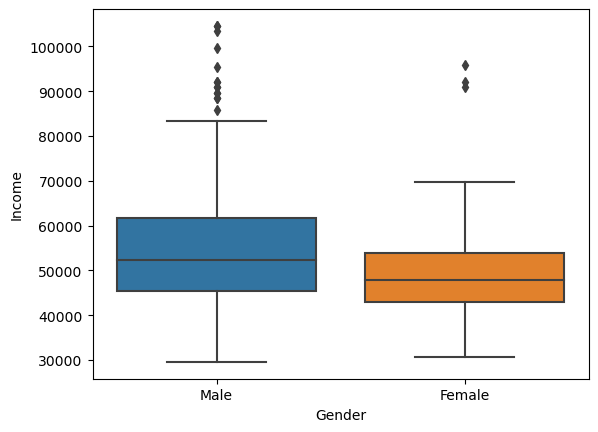

In [43]:
sns.boxplot(x= "Gender", y ="Income", data = df)

# CHISQURED TEST

Q1.A national survey was conducted to obtain information on the alcohol consumption patterns of U.S. adults by marital status. A random sample of 1772 residents 18 years old and older yielded the data displayed in Table below:

observed = [[67,213,74], [411,633,129], [85,51,7], [27,60,15]]

In [44]:
#H0: Marital status and alcohol consumption are not associated.
#Ha: Marital status and alcohol consumption are associated.

observed = [[67,213,74], [411,633,129], [85,51,7], [27,60,15]]

test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are not associated.")


Test statistic: 94.26880078578765
p-value: 3.925170647869838e-18
Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.


Q2.Preventable chronic diseases are increasing rapidly in Native American populations, particularly diabetes. Below is a contingency table showing the cross-classification of educational attainment and diabetic state.

observed = [[33, 218],[25, 389],[20, 393],[17, 178]]

In [45]:
#H0: educational level and diabetic state are not associated
#Ha: educational level and diabetic state are associated

observed = [[33, 218],[25, 389],[20, 393],[17, 178]]

test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are associated")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are not associated")


Test statistic: 17.51186847271713
p-value: 0.000554511571355531
Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are associated


Q3.A worldwide poll on religion was conducted by WIN-Gallup International and published as the document Global Index of Religiosity and Atheism. One question involved religious belief and educational attainment.

The following data is based on the answers to that question.

observed = [[77, 149, 78],[23, 56, 36],[8, 24, 29],[6, 15, 8]]

In [46]:
#H0: religiosity and education are not associated
#Ha: religiosity and education are associated

observed = [[77, 149, 78],[23, 56, 36],[8, 24, 29],[6, 15, 8]]

test_statistic,p_value,dof,expected_values=chi2_contingency(observed)
print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. religiosity and education are associated")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. religiosity and education are not associated")

Test statistic: 13.322313008960627
p-value: 0.038193742691133806
Reject H0 (Null Hypothesis),i.e. religiosity and education are associated


Q4.Nationwide surveys as a public service and for research. This problem is based on the results of one such poll that asked independent random samples of adults in urban, suburban, and rural regions,

"Do you support or oppose requiring background checks for all gun buyers?"

The survey results are in the table below: observed = [[335, 348, 318], [35, 23, 50]]

At the 1% significance level, do the data provide sufficient evidence to conclude that there is any association between response and three regions?

Choose the correct option below :

In [47]:
#H0 : response and regions are not associated
#Ha : response and regions are associated

observed = [[335, 348, 318], [35, 23, 50]]

test_statistic, p_value, dof, expected = chi2_contingency(observed)
print('p-value:',round(p_value,5))

if p_value > 0.01:
  print('Since p_value > 0.01 we fail to reject the null hypothesis(i.e.response and regions are not associated)')

else:
  print('Since p_value < 0.01 we reject the null hypothesis (i.e. response and regions are associated)')

p-value: 0.00315
Since p_value < 0.01 we reject the null hypothesis (i.e. response and regions are associated)


Q5.A random sample of adults yielded the following data on age and Internet usage.At the 1% significance level, does the data provide sufficient evidence to conclude that an association exists between age and Internet usage?

Choose the correct option below :

observed = [[6, 38, 31], [14, 31, 4],[50, 50, 5]]

In [48]:
#H0: Age and Internet usage are not associated
#Ha: Age and Internet usage are associated

observed = [[6, 38, 31], [14, 31, 4],[50, 50, 5]]

test_statistic, p_value, dof, expected = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)
print("Here p_value is nearly equal to 0")

alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Age and Internet usage are associated")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. Age and Internet usage are not associated")


Test statistic: 60.74604310295546
p-value: 2.0217185191724964e-12
Here p_value is nearly equal to 0
Reject H0 (Null Hypothesis),i.e. Age and Internet usage are associated


Q6.The U.S. Census Bureau compiles information on the money income of people by type of residence and publishes its finding in Current Population Reports.

Independent simple random samples of people residing inside principal cities (IPC), outside principal cities but within metropolitan areas (OPC), and outside metropolitan areas (OMA),

Gave the following data on income level.

observed = [[75, 106, 46],[106, 161, 61],[98, 183, 52],[48, 102, 14]]

In [49]:
#H0: type of residence is not related to income level
#Ha: type of residence is related to income level

observed = [[75, 106, 46],[106, 161, 61],[98, 183, 52],[48, 102, 14]]

test_statistic, p_value, dof, expected = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. type of residence is related to income level")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. type of residence is not related to income level")

Test statistic: 15.727554171801787
p-value: 0.015293451318673136
Reject H0 (Null Hypothesis),i.e. type of residence is related to income level


Q7.According to a survey conducted on car owners, it was determined that 60% of owners have only one car, 28% have two cars, and 12% have three or more cars.

Suppose you conducted your own survey and found that 73 owners have only one car, 38 owners have two cars, and 18 owners have three or more cars.

Determine whether your survey supports the original one, with a significance level of 0.05.

In [50]:
# Original survey distribution
expected_distribution = np.array([0.60, 0.28, 0.12])

# Your survey results
observed_distribution = np.array([73, 38, 18])

# Calculate the expected counts based on your sample size
total_sample_size = observed_distribution.sum()
print("total_sample_size is: ",total_sample_size)
expected_counts = expected_distribution * total_sample_size
print("expected_counts is: ",expected_counts)

# Perform the Chi-Square Goodness of Fit test
chi_squared_stat, p_value = chisquare(f_obs=observed_distribution, f_exp=expected_counts)

# Define the significance level (alpha)
alpha = 0.05

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. Your survey results are significantly different.")
else:
    print("Fail to reject the null hypothesis. Your survey results are consistent with the original survey.")



total_sample_size is:  129
expected_counts is:  [77.4  36.12 15.48]
Chi-Square Statistic: 0.7582133628645247
P-value: 0.6844725882551137
Fail to reject the null hypothesis. Your survey results are consistent with the original survey.


Q8.Suppose you have a coin, Perform a test to check whether the coin is fair or biased. You toss the coin 100 times and get 48 heads and 52 tails. You want to determine if the coin is fair at a 5% significance level.

In [51]:
#Approach-1

#Null Hypothesis (H0): The coin is fair (p(heads) = 0.5).
#Alternative Hypothesis (H1): The coin is not fair (p(heads) ≠ 0.5).

observed_counts = np.array([48, 52])
expected_counts = np.array([50, 50])

chi_squared_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The coin is not fair.")
else:
    print("Fail to reject the null hypothesis. The coin is fair.")


print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. The coin is fair.
Chi-Square Statistic: 0.16
P-value: 0.6891565167793516


In [52]:
#Approach-2

#Null Hypothesis (H0): The coin is fair (p(heads) = 0.5).
#Alternative Hypothesis (H1): The coin is not fair (p(heads) ≠ 0.5).

# first parameter is chi square statisitcs and 2nd parameter is degree of freedom
p_value = 1- chi2.cdf(chi_squared_stat, df=1) 


if p_value < alpha:
    print("Reject the null hypothesis. The coin is not fair.")
else:
    print("Fail to reject the null hypothesis. The coin is fair.")


print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. The coin is fair.
Chi-Square Statistic: 0.16
P-value: 0.6891565167793516


Q9.Suppose you are interested in the distribution of smartphone brands among a group of 200 people. You expect that 30% prefer Brand A, 40% prefer Brand B, and 30% prefer Brand C. You survey the group, and the results are as follows: 70 prefer Brand A, 80 prefer Brand B, and 50 prefer Brand C. You want to test if the distribution of preferences matches your expectations at a 5% significance level

In [53]:
#Null Hypothesis (H0): The distribution of smartphone brand preferences matches the expected distribution.
#Alternative Hypothesis (H1): The distribution of smartphone brand preferences does not match the expected distribution.


#Approch-1
observed_counts = np.array([70, 80, 50])
expected_counts = np.array([0.30 * 200, 0.40 * 200, 0.30 * 200])

chi_squared_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The distribution of smartphone brand preferences does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis. The distribution of smartphone brand preferences matches the expected distribution.")



Chi-Square Statistic: 3.3333333333333335
P-value: 0.1888756028375618
Fail to reject the null hypothesis. The distribution of smartphone brand preferences matches the expected distribution.


In [54]:
#Approach-2

#Null Hypothesis (H0): The distribution of smartphone brand preferences matches the expected distribution.
#Alternative Hypothesis (H1): The distribution of smartphone brand preferences does not match the expected distribution.

# first parameter is chi square statisitcs we get above and 2nd parameter is degree of freedom
p_value = 1- chi2.cdf(chi_squared_stat, df=2)

# Print the p-value
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis.The distribution of smartphone brand preferences does not match the expected distribution")
else:
    print("Fail to reject the null hypothesis.The distribution of smartphone brand preferences matches the expected distribution")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

P-value: 0.18887560283756177
Fail to reject the null hypothesis.The distribution of smartphone brand preferences matches the expected distribution
Chi-Square Statistic: 3.3333333333333335
P-value: 0.18887560283756177


# ClassWork/Notes of CHISQURED-Test

1.CHISQURED test is only applicable for Categorical columns data

2.When we have to work with two categorical columns(Gender,Maritial_status) data, then on that case we need to use CHISQURED Test.

3.Degree of Freedom(DOF)-Minimum value should be known to get the answer

Degree of freedom=(no of rows-1)*(no of columns)

4.Assumptions of Chi2 test

    1.Both the variables are categorical

    2.Observations are independent

    3.Each cell is mutually exclusive

    4.Expected value in each cell is greater than 5

5.When we know Obeserved and Expected value then-

        chi_squared_stat, p_value = chisquare(Obeserved,Expected)
              
When we have to work with independant data(Only Observed value should be known) then-

        test_statistic, p_value, dof, expected = chi2_contingency(observed)

6.From the Contigency table, we have to pick the data as ROW-WISE

7.For Chi2 Test-

    H0 always refers that(H0): Both the values are independant/Not associated
    Ha always refers that(Ha): Both the values are dependant/associated

Coin toss

In [55]:
#H0: Coin is fair
#Ha: coin is biased

alpha = 0.05

chi_stat , p_value = chisquare(
    [28, 22] , #observed
    [25, 25]   #Default
)

print('chi_stat: ',chi_stat)
print('p_value: ',p_value)

chi_stat:  0.72
p_value:  0.3961439091520741


In [56]:
#Alternative method

((28-25)**2)/25 + ((22-25)**2)/25

0.72

In [57]:
print(p_value)

0.3961439091520741


In [58]:
1 - chi2.cdf(0.72, df = 1) #finding p-value this way using chi2 stat value

0.3961439091520741

In [59]:
#find critical value of chisquare with 95% confidence: 5% significance

In [60]:
chi2.ppf(0.95, df=1)

if p_value < alpha:
  print("Reject H0")

In [61]:
#Testing independence with chi2_contingency

#HW--> explore crosstab --> pandas

#H0: Gender and Preference are independent
#Ha: Gender is dependent of preference (online/offline)


observed = [
    [527, 72],
    [206, 102]
]

chi_stat, p_value, df , exp_freq = chi2_contingency(observed)
print('chi_stat: ',chi_stat)
print('p_value: ',p_value)
print('df: ',df)
print('exp_freq: ',exp_freq)

if p_value < alpha:
  print("Reject H0")
  print("Gender has impact on Preference")
else:
  print("Fail to reject")
  print("Gender has no impact on preference")

chi_stat:  57.04098674049609
p_value:  4.268230756875865e-14
df:  1
exp_freq:  [[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0
Gender has impact on Preference


In [62]:
0.66*733

483.78000000000003

#Assumptions of Chi2 test

    Both the variables are categorical

    Observations are independent

    Each cell is mutually exclusive

    Expected value in each cell is greater than 5


# ANOVA

Q1.Independent simple random samples of households in the four regions yielded the data on last year’s energy consumptions.

a = [13, 8, 11, 12, 11]

b = [15, 10, 16, 11, 13, 10]

c = [5, 11, 9, 5]

d = [8, 10, 6, 5, 7]

At the 5% significance level, do the data provide sufficient evidence to conclude that a difference exists in last year’s mean energy consumption by households among the four regions?

Choose the correct option below :

In [63]:
# H0 : mean energy consumptions are equal
#Ha : Not all the means are equal

a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

test_statistic, p_value = f_oneway(a,b,c,d)

print(p_value)

if p_value < 0.05:
  print("Reject H0")
  print("Difference exists in last year’s mean energy consumption by households among the four regions")
else:
  print("Fail to reject H0")
  print("No difference exists in last year’s mean energy consumption by households among the four regions") 

0.0049302919205628576
Reject H0
Difference exists in last year’s mean energy consumption by households among the four regions


Q2."www.goodreads.com" is a website where people can leave their review about book and rate them. The books are rated from 5 stars (5), indicating a very good book, to 1 star (1), which means not worth reading, as per the reviews by members. The following table gives the number of pages of a random sample of books listed in the site.

one_star = [382, 391, 335, 368, 400, 372]

two_star = [560, 343, 512, 329, 391, 367]

three_star = [384, 458, 409, 309, 374, 459]

four_star = [325, 390, 304, 240, 306, 169]

five_star = [360, 298, 272, 368, 320, 326]

At the 1% significance level, do the data provide sufficient evidence to conclude that a difference exists in mean number of pages among books in the five rating groups?

Choose the correct option below :

In [64]:
#H0 : no difference exists in mean number of pages among books in the five rating groups
#Ha : difference exists in mean number of pages among books in the five rating groups

one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

test_statistic, p_value = f_oneway(one_star, two_star, three_star, four_star, five_star)

print('p_value: ',p_value)

if p_value < 0.01:
  print("Reject H0")
  print("Difference exists in mean number of pages among books in the five rating groups")
else:
  print("Fail to reject H0")
  print("No difference exists in mean number of pages among books in the five rating groups")

p_value:  0.009362001936328837
Reject H0
Difference exists in mean number of pages among books in the five rating groups


Q3.Consumer Reports publishes reviews and comparisons of products based on results from its laboratory. Data from their website gave the following table for battery lives in hours, for samples of SmartPhones made by four different mobile companies.

The four brands are iPhone 13, iPhone 11, One Plus 10, and Samsang Galaxy S21, but we have not used the names and have permuted the order.

Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]

Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]

Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]

Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

At the 5% significance level, do the data provide sufficient evidence to conclude that a difference exists in mean battery life among the four brands?

Choose the correct option below :

In [65]:
#H0 : no difference exists in mean battery life among the four brands
#Ha : difference exists in mean battery life among the four brands

Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

test_statistic, p_value = f_oneway(Brand_A, Brand_B, Brand_C, Brand_D)

print('p_value: ',p_value)

if p_value < 0.05:
  print("Reject H0")
  print("Difference exists in mean battery life among the four brands")
else:
  print("Fail to reject H0")
  print("No difference exists in mean battery life among the four brands") 

p_value:  2.392149441499325e-24
Reject H0
Difference exists in mean battery life among the four brands


Q4.Highway Administration conducts annual surveys on motor vehicle travel by type of vehicle and publishes its findings in Highway Statistics. Independent simple random samples of cars, buses, and trucks yielded the data on number of thousands of miles driven last year.

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]

buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]

trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

We want to decide whether a difference exists in last year’s mean number of miles driven among cars, buses, and trucks.

At the 7% significance level, do the data provide sufficient evidence to conclude that a difference exists in last year’s mean number of miles driven among cars, buses, and trucks.

Choose the correct option below :

In [66]:
#H0 : no difference exists in last year’s mean number of miles driven among cars, buses, and trucks.
#Ha : difference exists in last year’s mean number of miles driven among cars, buses, and trucks.

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

test_statistic, p_value = f_oneway(cars, buses, trucks)

print('p_value: ',p_value)


if p_value < 0.07:
  print("Reject H0")
  print("Difference exists in last year’s mean number of miles driven among cars, buses, and trucks.")
else:
  print("Fail to reject H0")
  print("No difference exists in last year’s mean number of miles driven among cars, buses, and trucks.") 

p_value:  0.10782985675757563
Fail to reject H0
No difference exists in last year’s mean number of miles driven among cars, buses, and trucks.


Q5.Check whether there is a significant difference (consider a 1% significance level) in the mean height of three groups of adult people. Height is in inches.

college_students = [71, 62, 63, 59, 67, 68, 63, 62, 66, 65, 61, 60]

athletes = [67, 68, 72, 66, 65, 69, 71, 70, 65, 64, 68]

army = [68, 67, 66, 68, 69, 70, 71, 69, 66, 67]

Choose the correct option below :

In [67]:
#Null Hypothesis (H0): The mean heights of the three groups are equal.
#Alternative Hypothesis (Ha): At least one mean height is different from the others.

# Data
college_students = [71, 62, 63, 59, 67, 68, 63, 62, 66, 65, 61, 60]
athletes = [67, 68, 72, 66, 65, 69, 71, 70, 65, 64, 68]
army = [68, 67, 66, 68, 69, 70, 71, 69, 66, 67]

# Perform ANOVA test
f_statistic, p_value = f_oneway(college_students, athletes, army)

# Significance level (alpha)
alpha = 0.01

# Compare p-value with significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the mean height of the three groups."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the mean height of the three groups."

print("F-statistic:", f_statistic)
print("p-value:", p_value)
print(conclusion)

F-statistic: 7.899836075209478
p-value: 0.0017534092082519943
Reject the null hypothesis. There is a significant difference in the mean height of the three groups.


Q6.Suppose you have data on 150 students' exam scores, and you want to test if the distribution of scores falls within

predefined categories. The expected distribution is 30% in the "Excellent" category, 40% in the "Good" category, and 30% in the

"Average" category. You observe that 45 students fall into the "Excellent" category, 50students into the "Good" category, and

55 students into the "Average" category. You want to test if the distribution matches expectations at a 5% significance level.

In [68]:
#Approach-1

#Null Hypothesis (H0): The distribution of exam scores matches the expected distribution.
#Alternative Hypothesis (H1): The distribution of exam scores does not match the expected distribution.

observed_counts = np.array([45, 50, 55])
expected_counts = np.array([0.30 * 150, 0.40 * 150, 0.30 * 150])

chi_squared_stat, p_value =chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The distribution of exam scores does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis. The distribution of exam scores matches the expected distribution.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. The distribution of exam scores matches the expected distribution.
Chi-Square Statistic: 3.8888888888888893
P-value: 0.1430666827544082


In [69]:
#pproach 2
 
from scipy.stats import chi2

# first parameter is chi square statisitcs and 2nd parameter is degree of freedom
p_value = 1- chi2.cdf(chi_squared_stat, df=2) 

# Print the p-value
print("P-value:", p_value)

P-value: 0.14306668275440826


Q7.Suppose you are interested in the distribution of the time spent by users on a website. You expect that 20% of users spend

less than 5 minutes, 50% spend between 5 and 10 minutes, and 30% spend more than 10 minutes. After collecting data from 200 

users, you find that 30 users spent less than 5 minutes, 85 users spent between 5 and 10 minutes, and 85 users spent more than

10 minutes. Test if the distribution of browsing times matches your expectations at a 5% significance level.

In [70]:
#Approach 1

#Null Hypothesis (H0): The distribution of browsing times matches the expected distribution.
#Alternative Hypothesis (H1): The distribution of browsing times does not match the expected distribution.

observed_counts = np.array([30, 85, 85])
expected_counts = np.array([0.20 * 200, 0.50 * 200, 0.30 * 200])

chi_squared_stat, p_value =chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The distribution of browsing times does not match expectations.")
else:
    print("Fail to reject the null hypothesis: The distribution of browsing times matches expectations.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Reject the null hypothesis: The distribution of browsing times does not match expectations.
Chi-Square Statistic: 15.166666666666666
P-value: 0.0005088621855732918


In [71]:
#Approach 2 

# first parameter is chi square statisitcs and 2nd parameter is degree of freedom
p_value = 1- chi2.cdf(chi_squared_stat, df=2) 

# Print the p-value
print("P-value:", p_value)

P-value: 0.0005088621855733333


# ClassWork/Notes of ANNOVA

1.Anova is nothing but the analysis of Variance

2.variance of 5,6,7

    Step 1: mean = (5 + 6 + 7)/3 = 18/3 = 6 
    
    Step 2: (5 – 6)2 + (6 – 6)2 + (7 – 6)2 = (-1)2 + 0 + (1)2 
    
    Step 3: (1 + 0 + 1)/3 =2/3= 0.667

3.1.Anova test comes into picture when we have to test with Numerical Vs Categorical data(Income Vs Product(egKP1,KP2,KP3)). 
    
    2.It will only work with more than 2-categorical data. 

    3.For anova 
        
        H0= all mean are equal 
        
        Ha=Not all mean are equal 
    
    4.syntax= f_oneway(sample1,sample2,sample3)

4.There is some assumption present to validate wheather the data can be test through Anova or not 

    1.Data should be Gaussian 
    
        a.we can check by histgram -->eg=sns.histplot(data) 
       
        b.By qqplot-->eg=qqplot(data=data,line='s') 
       
        c.it should pass shapiro test for shapiro sample size should be within 50-200
        
        and H0=data should be gaussian 
        
            Ha=data is not gaussian 
               
               syntax=shapiro(data) 
                
    2.Equal variance this test is used to check wheather the variance difference is by chance or significant 
   
       H0=varicance are equal 
       
       Ha=variance are not equal levene(data1, data2) 
    
** If all the above assumption passed then we can do Anova test 

5. If any of the Anova(Or H0 is got rejected) failed then in that case we have to use kruskal Test kruskal(data)

In [72]:
df_aerofit=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\\aerofit.csv")
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [73]:
df_aerofit['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [74]:
df_aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

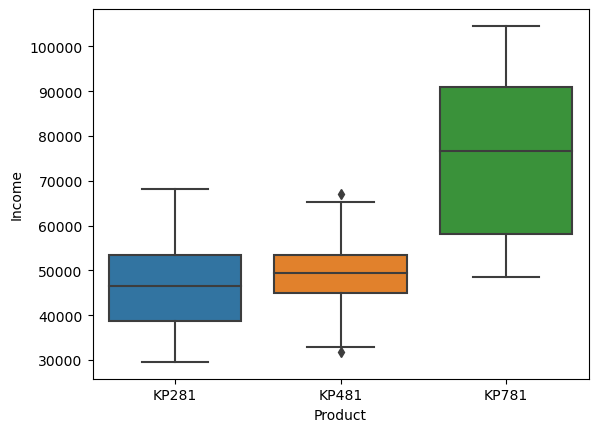

In [75]:
sns.boxplot(x='Product',y='Income',data=df_aerofit)
plt.show()

In [76]:
df_aerofit['random_group']=np.random.choice(['g1','g2','g3'],size=len(df_aerofit))

In [77]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g1
1,KP281,19,Male,15,Single,2,3,31836,75,g3
2,KP281,19,Female,14,Partnered,4,3,30699,66,g2
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g3


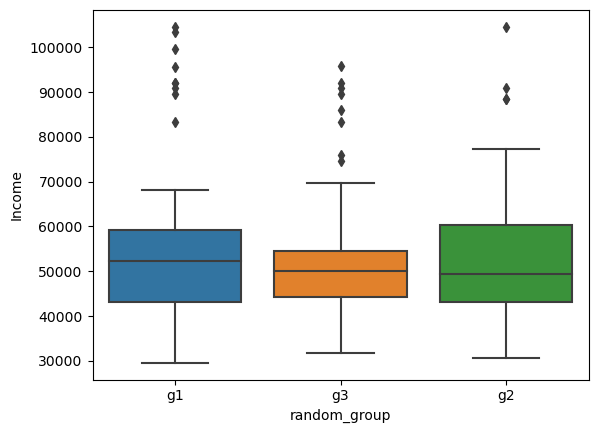

In [78]:
sns.boxplot(x='random_group',y='Income',data=df_aerofit)
plt.show()

In [79]:
income_g1=df_aerofit[df_aerofit['random_group']=='g1']['Income']
income_g2=df_aerofit[df_aerofit['random_group']=='g2']['Income']
income_g3=df_aerofit[df_aerofit['random_group']=='g3']['Income']

In [80]:
income_g1.mean()

55944.34375

In [81]:
income_g2.mean()

52733.86538461538

In [82]:
income_g3.mean()

52295.703125

In [83]:
#H0: All groups have same mean
#Ha: One or more groups have different mean

In [84]:
f_stat,p_val=f_oneway(income_g1,income_g2,income_g3)

In [85]:
print(f_stat,p_val)

0.9112171366670702 0.4039120852153316


In [86]:
if p_val<0.05:
    print("Reject H0")
else:
    print("Fail to reject")

Fail to reject


In [87]:
income_kp281 = df_aerofit[df_aerofit["Product"] == "KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"] == "KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"] == "KP781"]["Income"]

In [88]:
income_kp281.mean()

46418.025

In [89]:
income_kp481.mean()

48973.65

In [90]:
income_kp781.mean()

75441.575

In [91]:
#H0: All groups have same mean
#Ha: One or more group have different mean

f_stats, p_value = f_oneway(income_kp281, income_kp481,income_kp781)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have same mean")

Reject H0


In [92]:
#Doing this just for reference

f_stat,p_val=f_oneway(income_g1,income_g2,income_g3)

print(p_val,f_stat)

if p_val<0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.4039120852153316 0.9112171366670702
Fail to reject H0


In [93]:
k_stat, p_value =  kruskal(income_g1,income_g2, income_g3)
print(p_value)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have same mean")

0.3863006214332164
Fail to reject H0
All groups have same mean


In [94]:
df_hw=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\\weight-height.csv")
df_wt=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\\waiting_time.csv")

In [95]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


In [96]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [97]:
# Assumptions:
# 1. Gaussian
# 2. Independent
# 3. Equal Variance

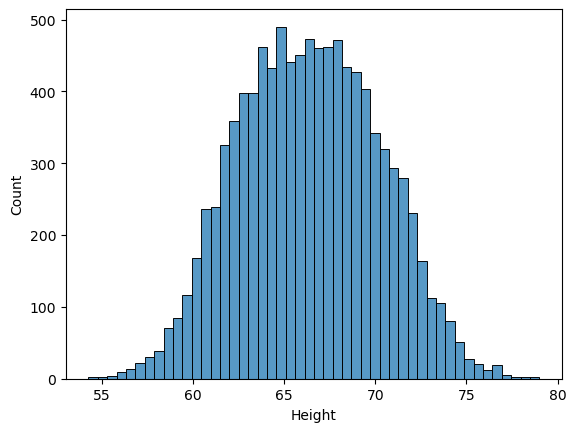

In [98]:
height=df_hw['Height']
sns.histplot(height)
plt.show()

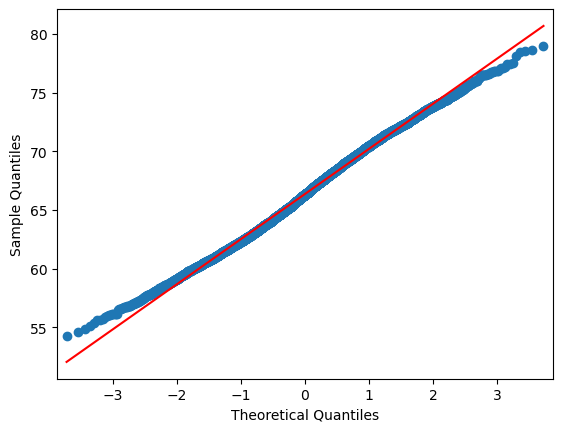

In [99]:
qqplot(height,line='s')
plt.show()

In [100]:
weight=df_wt['time']

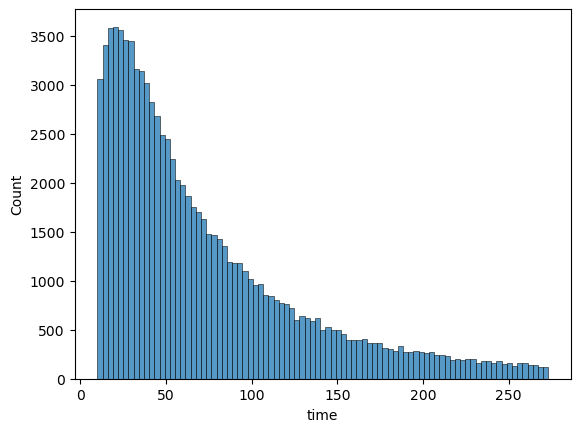

In [101]:
sns.histplot(weight)
plt.show()

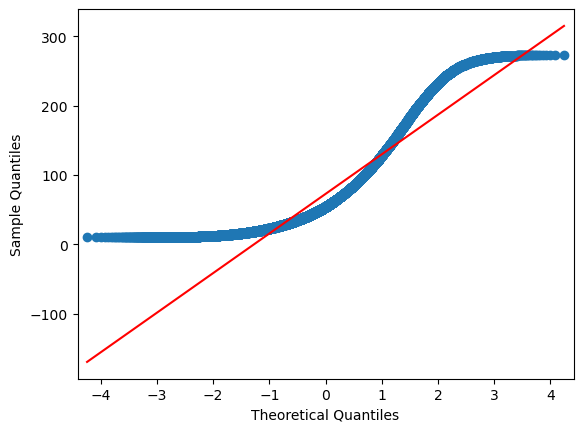

In [102]:
qqplot(weight,line='s')
plt.show()

Shapiro test for Gaussian

It Take a few samples of data (50 to 200). This test may not work if data is too large



In [103]:
height_subset=height.sample(100)

In [104]:
#H0: Data is Gaussian
#Ha: Data is not Guassian


test_stat, p_value = shapiro(height_subset)

if p_value < 0.05:
  print("Reject H0")
  print("Not Gaussian")
else:
  print("Fail to reject H0")
  print("Follows Gaussian")

Fail to reject H0
Follows Gaussian


In [105]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


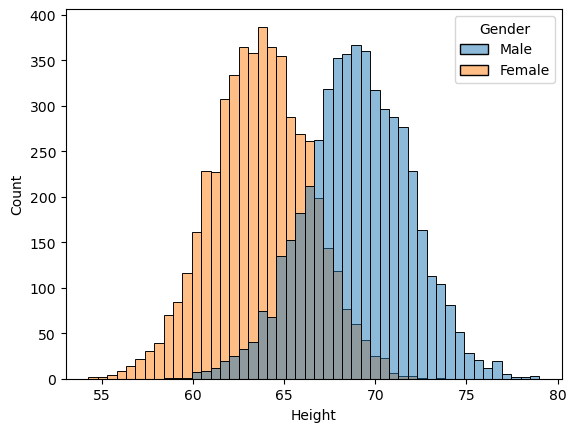

In [106]:
sns.histplot(data=df_hw,x='Height',hue='Gender')
plt.show()

In [107]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [108]:
height_men.mean()

69.02634590621741

In [109]:
height_women.mean()

63.70877360342507

In [110]:
height_men.var()

8.19884325252049

In [111]:
height_women.var()

7.269947493670132

In [112]:
#To establish whether this difference we see in the variance is by chance or significant, we have to use Levene test

In [113]:
#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(height_men, height_women)

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

Reject H0
Variance are not equal


SUMMERY

    ttest --> Numeriical vs Cat --> 2 categories 
    
    Anova -> Numerical vs Cat --> more than 2 categories 

Assumtions: 

    1 - gaussian: qqplot, shapiro 
    
    2- equal variance --> levene 
    
    3- independence If any of the assumtions of Anova fails, we use Kruskal wallis test

# Co-Relation Test

Q1.Given correlation coefficient between X and Y as 0.7 and covariance between the same as 73, what is variance of Y if variance of X is 25?

coefficent=Cov_x_y/sigma_x*sigma_y
Cov_x_y=73

In [114]:
Cov_x_y=73
sigma_x=5
coefficent=0.7

#we know that

#coefficent=Cov_x_y/sigma_x*sigma_y

sigma_y=Cov_x_y/(sigma_x*coefficent)

print('sigma_y: ',sigma_y)

var_y=sigma_y**2

print('var_y: ',var_y)



sigma_y:  20.857142857142858
var_y:  435.0204081632653


Q2.The Zumba trainer claims to the customers, that their new dance routine helps to reduce more weight.

Weight of 8 people were recorded before and after following the new Zumba training for a month:

wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

Test the trainer's claim with 90% confidence. Further, What would be the value of test statistic for this?

In [115]:
#H0: Customers did not reduce their weight after 1 month of new Zumba routine μBefore=μAfter
 
#H1: Customers have reduced their weight after 1 month of new Zumba routine μBefore<μAfter 

#The nature of data here is in the form of “Before” and “After” . Hence we will use Paired T-test using ttest_rel()

wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]
wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

alpha = 0.10 # Significance level

t_stat, pvalue = ttest_rel(wt_before, wt_after, alternative="less" )
print('Test Statistic:', t_stat)
print('P value:', pvalue)

if pvalue < alpha:
  print('Reject H0 ; Customers have reduced their weight after 1 month of new Zumba routine')
else:
  print('Fail to reject H0 ; Customers did not reduce their weight after 1 month of new Zumba routine')

Test Statistic: 1.1421853793555032
P value: 0.8545319149867361
Fail to reject H0 ; Customers did not reduce their weight after 1 month of new Zumba routine


Q3.You are appointed as a Data Analyst for a training program deployed by the Government of India.

The participants’ skills were tested before and after the training using some metrics on a scale of 10.

before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

Conduct paired t-test to assess the impact of the training program, and then answer the below questions accordingly.

Note: Perform the paired t-test at alpha = 5%.

In [116]:
#H0: No improvement in skills after training, i.e. μ1=μ2

#Ha: Positive effect / improvement in skills after training, i.e. μ1<μ2

before= [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]
after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

before_mean = np.mean(np.array(before))
after_mean = np.mean(np.array(after))

print("before mean:",before_mean)
print("after mean:",after_mean)

t_obs, p =ttest_rel(before, after, alternative="less")

print(" T statistic = ", round(t_obs,2))
print(" p-value = ", round(p,4))

if(p < 0.05):
  print("Since, p-value < alpha, we reject the null hypothesis. Positive effect / improvement in skills after training")
else:
  print("Since, p-value > alpha, we fail to reject the null hypothesis. No effect / improvement in skills after training")

before mean: 1.567
after mean: 4.922000000000001
 T statistic =  -5.11
 p-value =  0.0003
Since, p-value < alpha, we reject the null hypothesis. Positive effect / improvement in skills after training


# ClassWork/Notes of Co-Relation Test

1.Num vs Cat-

    1.T-tets(2cat)
    
    2.Anova(more than 2cat)

Cat vs Cat-

    1.Chi2 Test

Num vs Num- 

    1.Co-relation Test

2.Formula of co-relation=coefficent=Cov(xy)/(sigma(x)*sigma(y))

3.When we have to do operation with two numerical data, then in that case we have to use Co-Relation Test.

In [117]:
hw=pd.read_csv("D:\SCALER_CLASSES\HYPOTHESEIS TESTING(Mod-7)\Dataset\\weight-height.csv")

In [118]:
hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


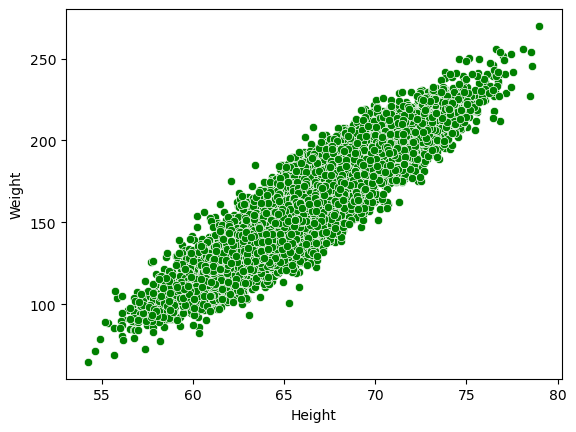

In [119]:
sns.scatterplot(x="Height",y="Weight",data=hw,color='Green')
plt.show()

In [120]:
hw[['Height','Weight']].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


# Advanced Distributions - 1

Q1.If electricity power failures occur according to a poisson distribution with an average of three failures every 20 weeks, calculate the probability that there will not be more than one failure during a week.

In [122]:
mu = 3/20
x = 1
p1 = poisson.cdf(x,mu)

print('The probability that there will not be more than one failure during a week:',p1)

The probability that there will not be more than one failure during a week: 0.9898141728888165


Q2.An observer counts 240 vehicles per hour (3600 seconds) at a specific vehicle arrival location on a highway.
Assume that the arrivals follow the poisson distribution, What is the probability of one vehicle arriving over a 30-second time interval?

In [124]:
x=1
mu= 2

p1=poisson.pmf(x,mu)

print('The probability of one vehicle arriving over a 30-second time interval:',p1)

The probability of one vehicle arriving over a 30-second time interval: 0.2706705664732254


Q3.Suppose that trees are distributed in a forest according to a Poisson process with a rate of λ per acre. The expected number of trees per acre is equal to 74.

What is the probability that in a certain quarter-acre plot, there will be at most 15 trees?

What is the probability that in a certain quarter-acre plot, there will be at least 7 trees?

In [127]:
p = 0.25
n = 74
mu = n*p

x1=15
p1 = poisson.cdf(x1,mu)

print("The probability that in a certain quarter-acre plot, there will be at most 15 trees:",p1)

# P(X >= 7) = 1 - P ( X ≤ 6)
x2 = 6
p2 = 1 - (poisson.cdf(x2,mu))

print("The probability that in a certain quarter-acre plot, there will be at least 7 trees:",p2)


The probability that in a certain quarter-acre plot, there will be at most 15 trees: 0.24902769151284776
The probability that in a certain quarter-acre plot, there will be at least 7 trees: 0.9992622541111789


Q4.You go to a party of 500 guests. What is the probability that exactly one other guest has the same birthday as you?

Note: Exclude birthdays on February 29.

In [128]:
p = 1/365
n = 499
mu = n * p
x=1
p1 = poisson.pmf(x,mu)

print('The probability that exactly one other guest has the same birthday as you:',p1)

The probability that exactly one other guest has the same birthday as you: 0.34839633781319934


# ClassWork/Notes of Advanced Distributions - 1

More than/ At most is mentioned then => K= is same as questions

Less than/At least mentioned then =>K shoule be 1-K

If Exact number is mentioned in questions then we have to use poisson.pmf(k,mu)

If atleast/atmost/greater/lesser is mentioned in questons then we have to use poisson.cdf(k,mu)